### Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃): 일 최고 기온

In [1]:
import pandas as pd

# 데이터 세트 호출
m_df = pd.read_csv('./datasets/korea_mosquito.csv')
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


#### 📊 데이터 정보 확인

In [3]:
# 데이터 정보
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


#### 📊 데이터 결측치

In [4]:
# 데이터 결측치 확인
m_df.isna().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

#### 📊 데이터 중복행

In [5]:
# 데이터 중복행 확인
m_df.duplicated().sum()

47

In [6]:
# 데이터 중복행 제거
pre_m_df = m_df.drop_duplicates()

In [7]:
pre_m_df.duplicated().sum()

0

#### 📊 날짜 별 모기 비율 확인

In [8]:
# 날짜 형식 변환
pre_m_df.date = pd.to_datetime(pre_m_df.date, dayfirst=True, format='mixed')
pre_m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


#### ❗ 이슈
<code>pre_m_df.date = pd.to_datetime(pre_m_df.date, dayfirst=True)</code>

ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 12. You might want to try:  
    - passing `format` if your strings have a consistent format;  
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;  
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

#### 💡 해결
- 날짜 형식이 일정하지 않아 발생하는 오류
- format='mixed'를 추가하여 해결 가능

In [9]:
# 날짜 별 모기 비율 확인
group_m_df = pre_m_df[['date', 'mosquito_Indicator']].groupby('date').sum('mosquito_Indicator').reset_index()
group_m_df

,date,mosquito_Indicator
0,2016-05-01,254.4
1,2016-05-02,273.5
2,2016-05-03,304.0
3,2016-05-04,256.2
4,2016-05-05,243.8
...,...,...
1290,2019-12-27,5.5
1291,2019-12-28,5.5
1292,2019-12-29,5.5
1293,2019-12-30,5.5


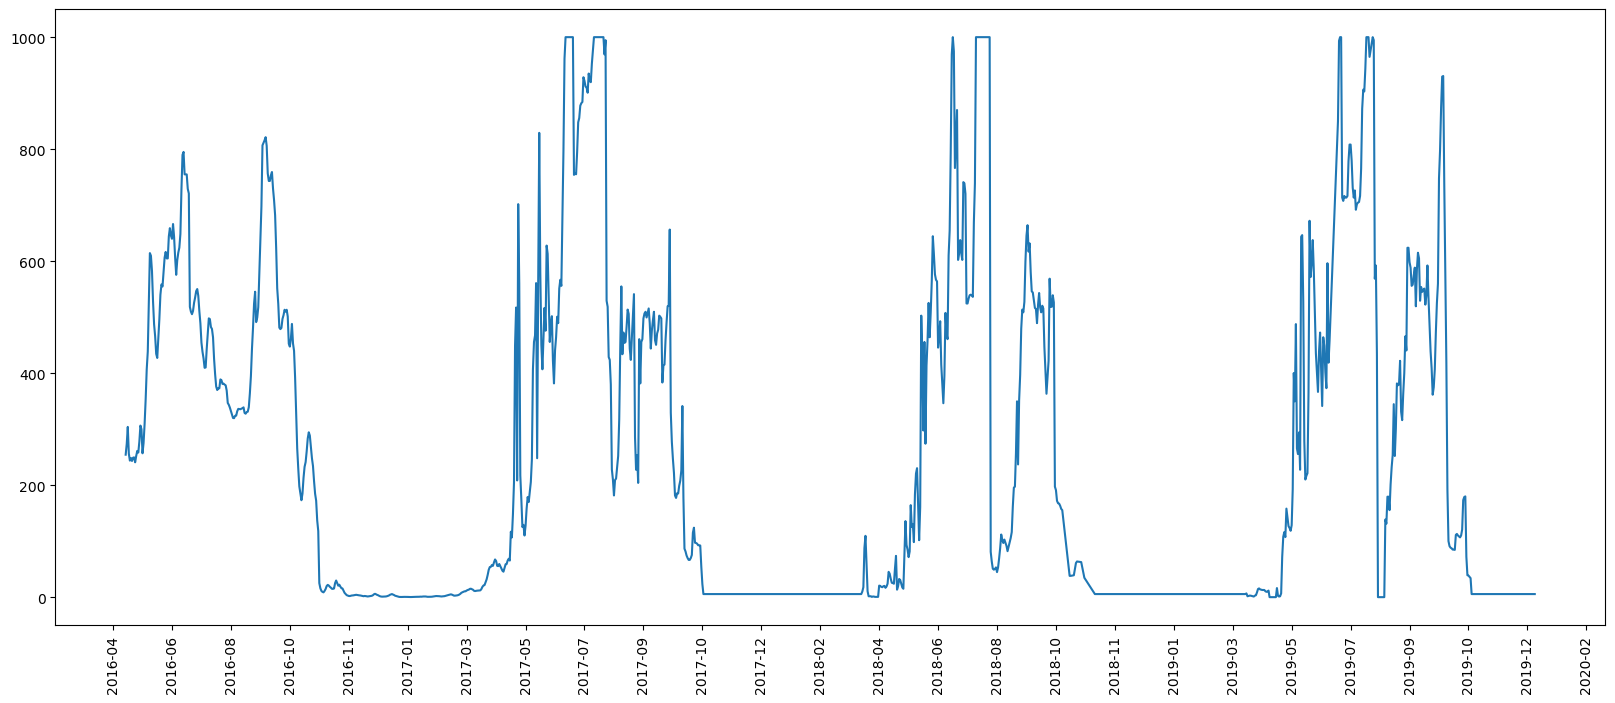

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))

date_format = mdates.DateFormatter('%Y-%m')

# 8주 단위
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
ax.xaxis.set_major_formatter(date_format)
ax.plot(group_m_df['date'], group_m_df['mosquito_Indicator'])
# x 레이블 90도로 설정
plt.xticks(rotation=90)

plt.show()

#### 📊 일부 피처 추출

In [11]:
# 일부 피처 추출
columns = ['rain(mm)', 'mean_T(℃)', 'min_T(℃)', 'max_T(℃)', 'mosquito_Indicator']

pre_m_df = pre_m_df[columns].reset_index(drop=True)
pre_m_df

,rain(mm),mean_T(℃),min_T(℃),max_T(℃),mosquito_Indicator
0,0.0,18.8,12.2,26.0,254.4
1,16.5,21.1,16.5,28.4,273.5
2,27.0,12.9,8.9,17.6,304.0
3,0.0,15.7,10.2,20.6,256.2
4,7.5,18.9,10.2,26.9,243.8
...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,5.5
1338,0.0,1.1,-3.6,6.1,5.5
1339,1.4,3.8,1.1,6.2,5.5
1340,0.4,2.7,-5.7,6.8,5.5


#### 📊 분포

array([[<Axes: title={'center': 'rain(mm)'}>,
        <Axes: title={'center': 'mean_T(℃)'}>],
       [<Axes: title={'center': 'min_T(℃)'}>,
        <Axes: title={'center': 'max_T(℃)'}>],
       [<Axes: title={'center': 'mosquito_Indicator'}>, <Axes: >]],
      dtype=object)

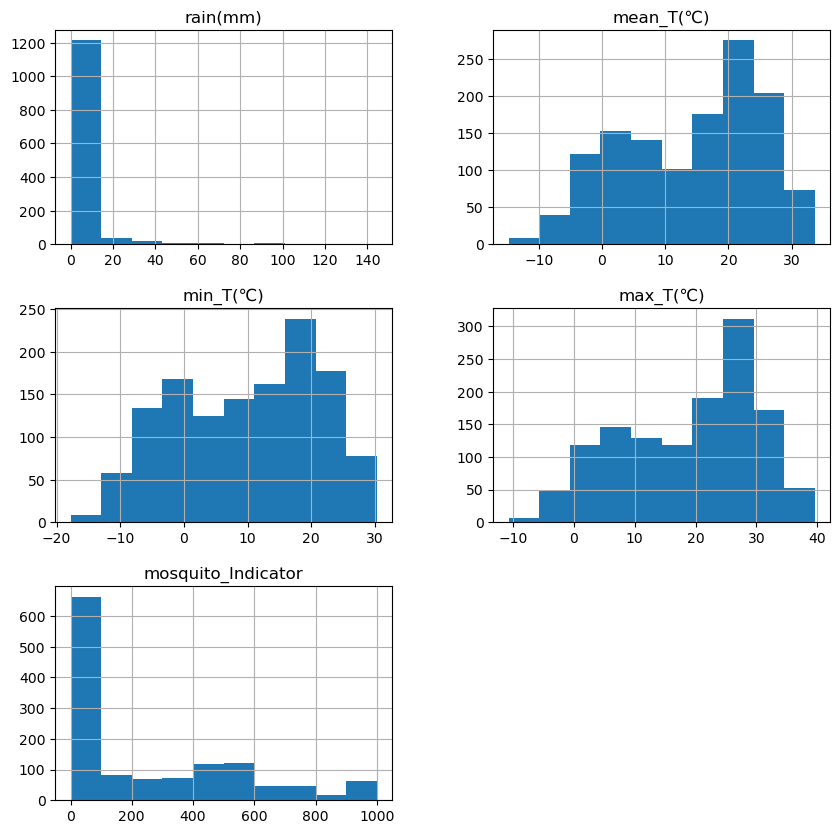

In [12]:
# 분포 확인
pre_m_df.hist(figsize=(10, 10))

#### 📊 OLS

In [13]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              902.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:58:40   Log-Likelihood:                         -8686.3
No. Observations:                1295   AIC:                                  1.738e+04
Df Residuals:                    1291   BIC:                                  1.740e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 📊 VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [15]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(℃)
2,200.659322,min_T(℃)
3,342.476613,max_T(℃)


#### 📊 상관관계

In [16]:
# 상관관계 확인
pre_m_df.corr()['mosquito_Indicator'].sort_values(ascending=False)[1:]

min_T(℃)     0.743387
mean_T(℃)    0.728177
max_T(℃)     0.698576
rain(mm)     0.186194
Name: mosquito_Indicator, dtype: float64

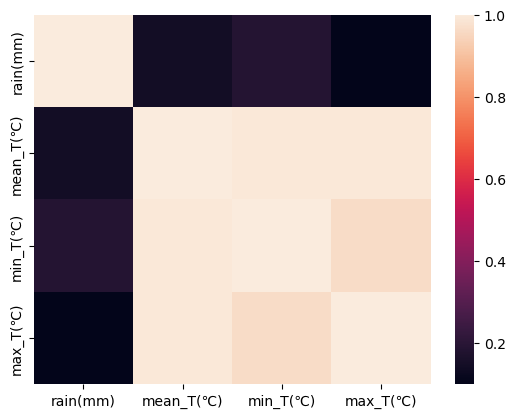

In [17]:
import seaborn as sns

# 상관관계 히트맵으로 확인
sns.heatmap(features.corr())
plt.show()

#### 📊 회귀 분석

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [20]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 44528.4874, RMSE: 211.0177, R2: 0.5505


#### 🚩 결과
- 다중 공산성이 높게 나타남에 따라 분포를 맞춰주기

#### 📊 분포

#### ❗ 이슈
<code>np.log1p(pre_m_df).hist(figsize=(10, 8))</code>

ValueError: supplied range of [-inf, 3.4436180975461075] is not finite

#### 💡 해결
- 로그가 불가능한 값을 가지고 있다는 문제 발생
- yeo-johnson을 사용하여 처리

In [21]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_m_df[['mosquito_Indicator']])
pre_m_df['mosquito_Indicator'] = result

pre_m_df

C:\Users\LEGION\AppData\Local\Temp\ipykernel_20680\3532667725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_m_df['mosquito_Indicator'] = result


,rain(mm),mean_T(℃),min_T(℃),max_T(℃),mosquito_Indicator
0,0.0,18.8,12.2,26.0,6.571413
1,16.5,21.1,16.5,28.4,6.672078
2,27.0,12.9,8.9,17.6,6.819922
3,0.0,15.7,10.2,20.6,6.581196
4,7.5,18.9,10.2,26.9,6.512448
...,...,...,...,...,...
1337,0.0,-1.7,-4.6,2.6,1.980530
1338,0.0,1.1,-3.6,6.1,1.980530
1339,1.4,3.8,1.1,6.2,1.980530
1340,0.4,2.7,-5.7,6.8,1.980530


array([[<Axes: title={'center': 'rain(mm)'}>,
        <Axes: title={'center': 'mean_T(℃)'}>],
       [<Axes: title={'center': 'min_T(℃)'}>,
        <Axes: title={'center': 'max_T(℃)'}>],
       [<Axes: title={'center': 'mosquito_Indicator'}>, <Axes: >]],
      dtype=object)

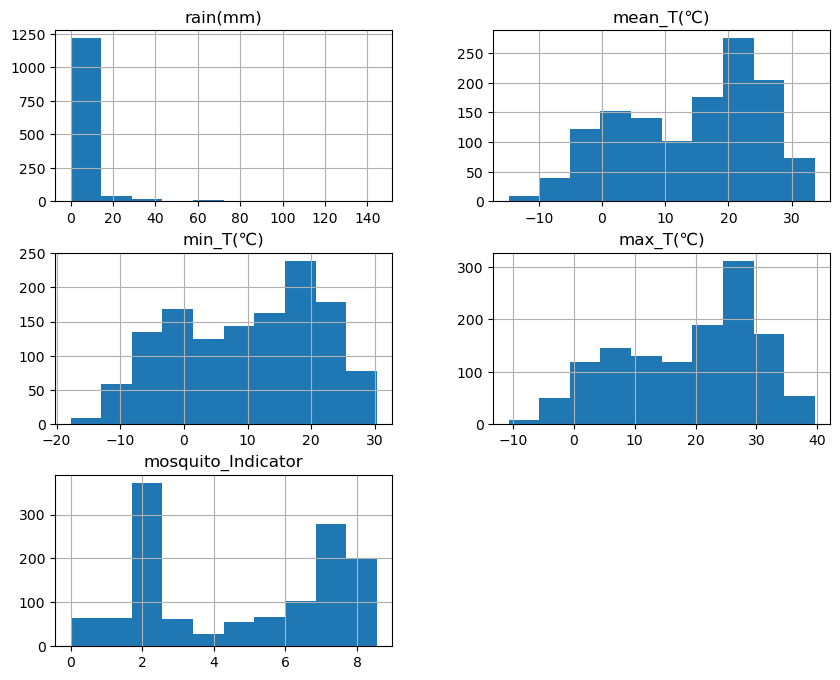

In [22]:
pre_m_df.hist(figsize=(10, 8))

#### 📊 OLS

In [23]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              3520.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:58:41   Log-Likelihood:                         -2431.8
No. Observations:                1295   AIC:                                      4872.
Df Residuals:                    1291   BIC:                                      4892.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 📊 VIF

In [24]:
# VIF 확인
get_vif(features)

,vif_score,feature
0,1.106421,rain(mm)
1,1001.901034,mean_T(℃)
2,200.659322,min_T(℃)
3,342.476613,max_T(℃)


#### 📊 상관관계

In [25]:
# 상관관계 확인
pre_m_df.corr()['mosquito_Indicator'].sort_values(ascending=False)[1:]

min_T(℃)     0.846382
mean_T(℃)    0.843847
max_T(℃)     0.823627
rain(mm)     0.170870
Name: mosquito_Indicator, dtype: float64

#### 📊 회귀 분석

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련: 모델이 최적의 가중치와 편향을 학습
l_r.fit(X_train, y_train)

LinearRegression()

In [27]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 2.3556, RMSE: 1.5348, R2: 0.6912
